## Desafio 1

Crie uma função que receba como parâmetro de entrada o caminho de uma imagem e retorne a cor mais predominante encontrada.
Escolha apropriadamente a melhor forma de identificação e carcterízação de cores.
Deverão ser testadas 3 imagens que se encontram no Github, pasta imagens.

## 1. Requerimentos

Todas as bibliotecas já estão instaladas no Google Colab.

* OpenCV >= 3.4.3
* Matplotlib >= 3.1.3
* Seaborn >= 0.0.10
* Numpy >= 1.18.1

### 1.2 Arquivos

Baixe o repositório do GitHub utilizando o comando abaixo. Em caso de atualização, utilize o comando para apagar o diretório antes.

In [1]:
!rm -rf fiap-ml-visao-computacional/

In [2]:
!git clone https://github.com/FIAPON/fiap-ml-visao-computacional.git

Cloning into 'fiap-ml-visao-computacional'...
remote: Enumerating objects: 64966, done.
remote: Counting objects: 100% (885/885), done.
remote: Compressing objects: 100% (735/735), done.
remote: Total 64966 (delta 163), reused 857 (delta 136), pack-reused 64081 (from 1)
Receiving objects: 100% (64966/64966), 668.97 MiB | 23.65 MiB/s, done.
Resolving deltas: 100% (178/178), done.
Updating files: 100% (66517/66517), done.


Vamos agora posicionar o diretório do repositório para a aula respectiva. Nesse caso envie o comando de mudança de diretório

In [3]:
%cd fiap-ml-visao-computacional/aula-1-introducao-visao-computacional/desafio-1/

/content/fiap-ml-visao-computacional/aula-1-introducao-visao-computacional/desafio-1


> Atenção: este notebook foi desenhado para funcionar no **Google Collab**. Se pretende executar localmente prefira a versão local deste notebook, sem o sufixo ```-collab```.

![](https://github.com/FIAPON/fiap-ml-visao-computacional/blob/main/aula-1-introducao-visao-computacional/desafio-1/imagens/futebol.jpg?raw=1)
![](https://github.com/FIAPON/fiap-ml-visao-computacional/blob/main/aula-1-introducao-visao-computacional/desafio-1/imagens/moda.jpg?raw=1)
![](https://github.com/FIAPON/fiap-ml-visao-computacional/blob/main/aula-1-introducao-visao-computacional/desafio-1/imagens/simpsons.jpeg?raw=1)

Importação das bibliotecas.

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

## 2. Solução

Desenvolvimento das funções.

In [12]:
def extrair_cor_caracteristica(imagem):

    cores = []

    image_hsv = cv2.imread(imagem)
    hsv_image = cv2.cvtColor(image_hsv, cv2.COLOR_BGR2HSV)
    hue_hist = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])
    plt.plot(hue_hist)
    plt.show()
    top_cores = np.argpartition(hue_hist.ravel(), -3)[-3:]

    for valor in top_cores:
        if valor >= 0 and valor <= 15:
            cor = "vemelho"
        elif valor > 15 and valor <= 22:
            cor = "laranja"
        elif valor > 22 and valor <= 30:
            cor = "amarelo"
        elif valor > 30 and valor <= 37:
            cor = "amarelo"
        elif valor > 37 and valor <= 60:
            cor = "verde"
        elif valor > 60 and valor <= 75:
            cor = "verde"
        elif valor > 75 and valor <= 90:
            cor = "magenta"
        elif valor > 90 and valor <= 105:
            cor = "magenta"
        elif valor > 105 and valor <= 120:
            cor = "azul"
        elif valor > 120 and valor <= 135:
            cor = "roxo"
        elif valor > 135 and valor <= 150:
            cor = "rosa"
        elif valor > 150 and valor <= 165:
            cor = "rosa"
        elif valor > 165 and valor <= 180:
            cor = "vermelho"
        cores.append(cor)

    cores = set(cores)
    return cores

Execução das funções passando as imagens por parâmetro de entrada.

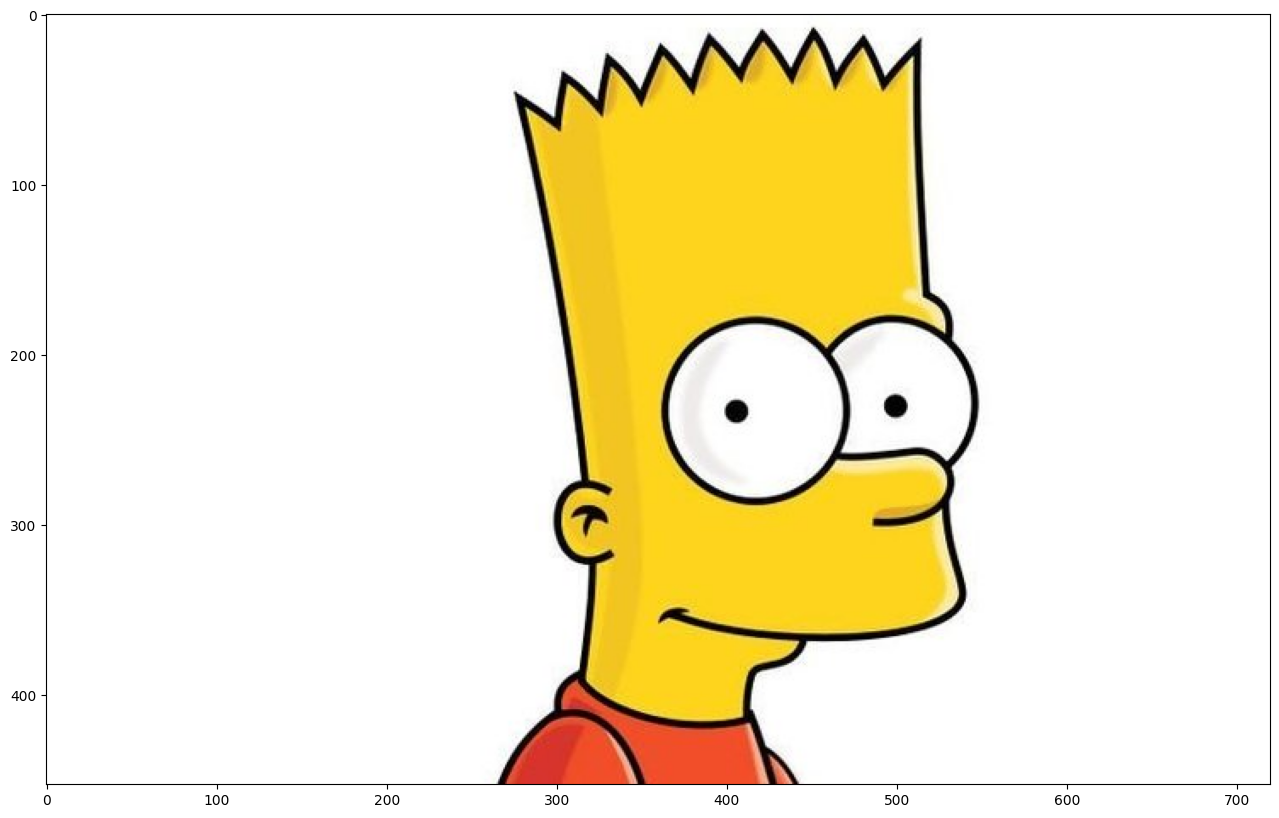

In [20]:
imagem_path = "imagens/simpsons.jpeg"
imagem = cv2.imread(imagem_path)
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem)

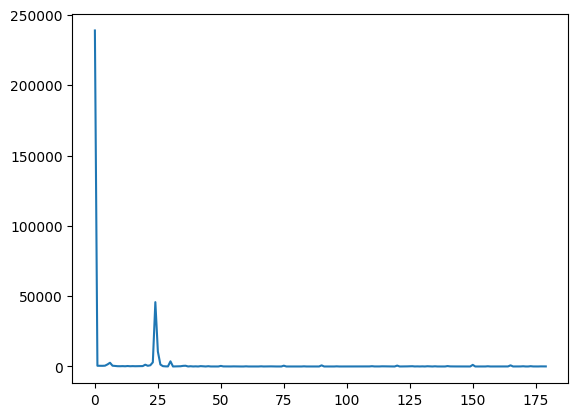

{'amarelo', 'vemelho'}

In [14]:
extrair_cor_caracteristica(imagem_path)

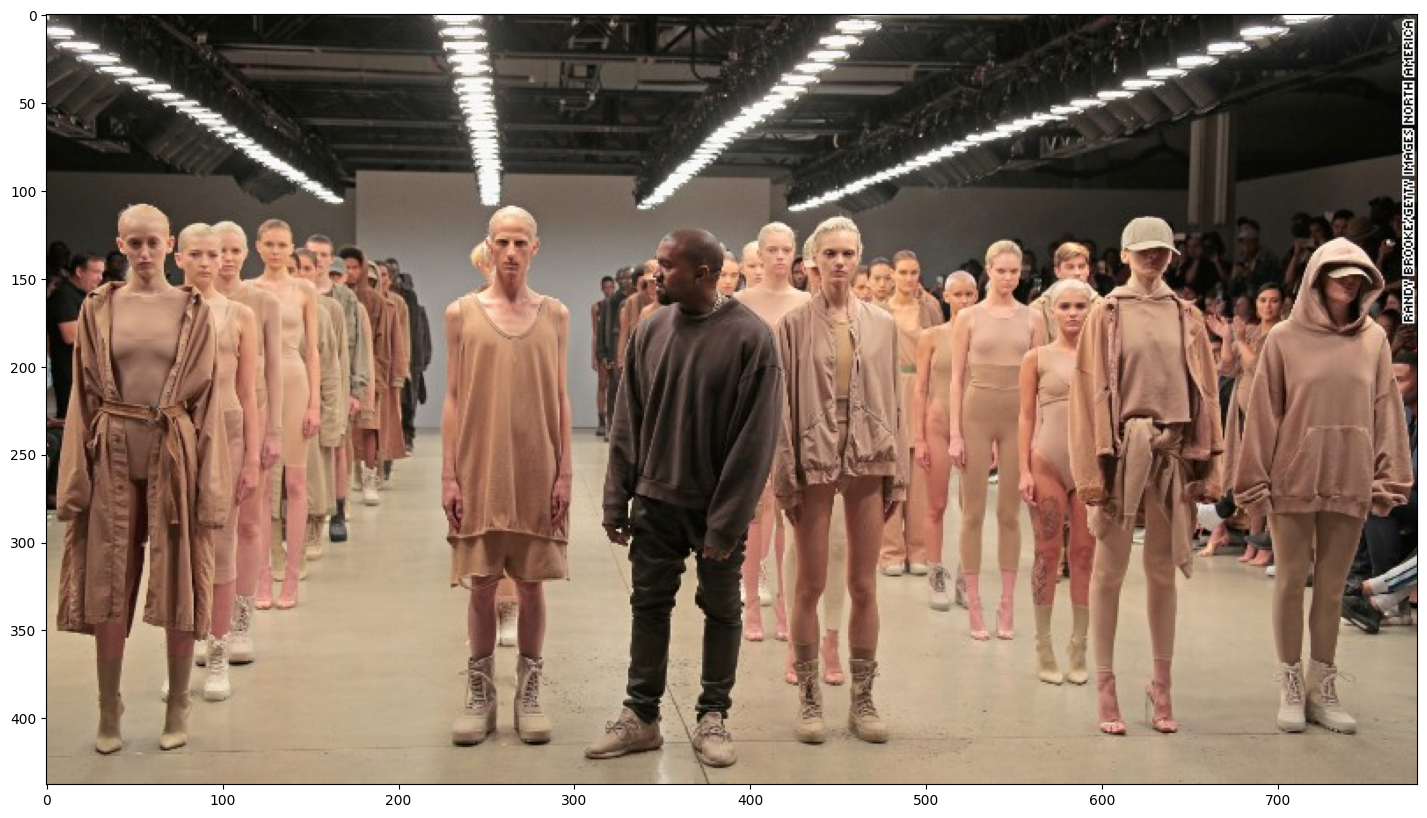

In [21]:
imagem_path = "imagens/moda.jpg"
imagem = cv2.imread(imagem_path)
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem)

In [9]:
#IMPLEMENTAR

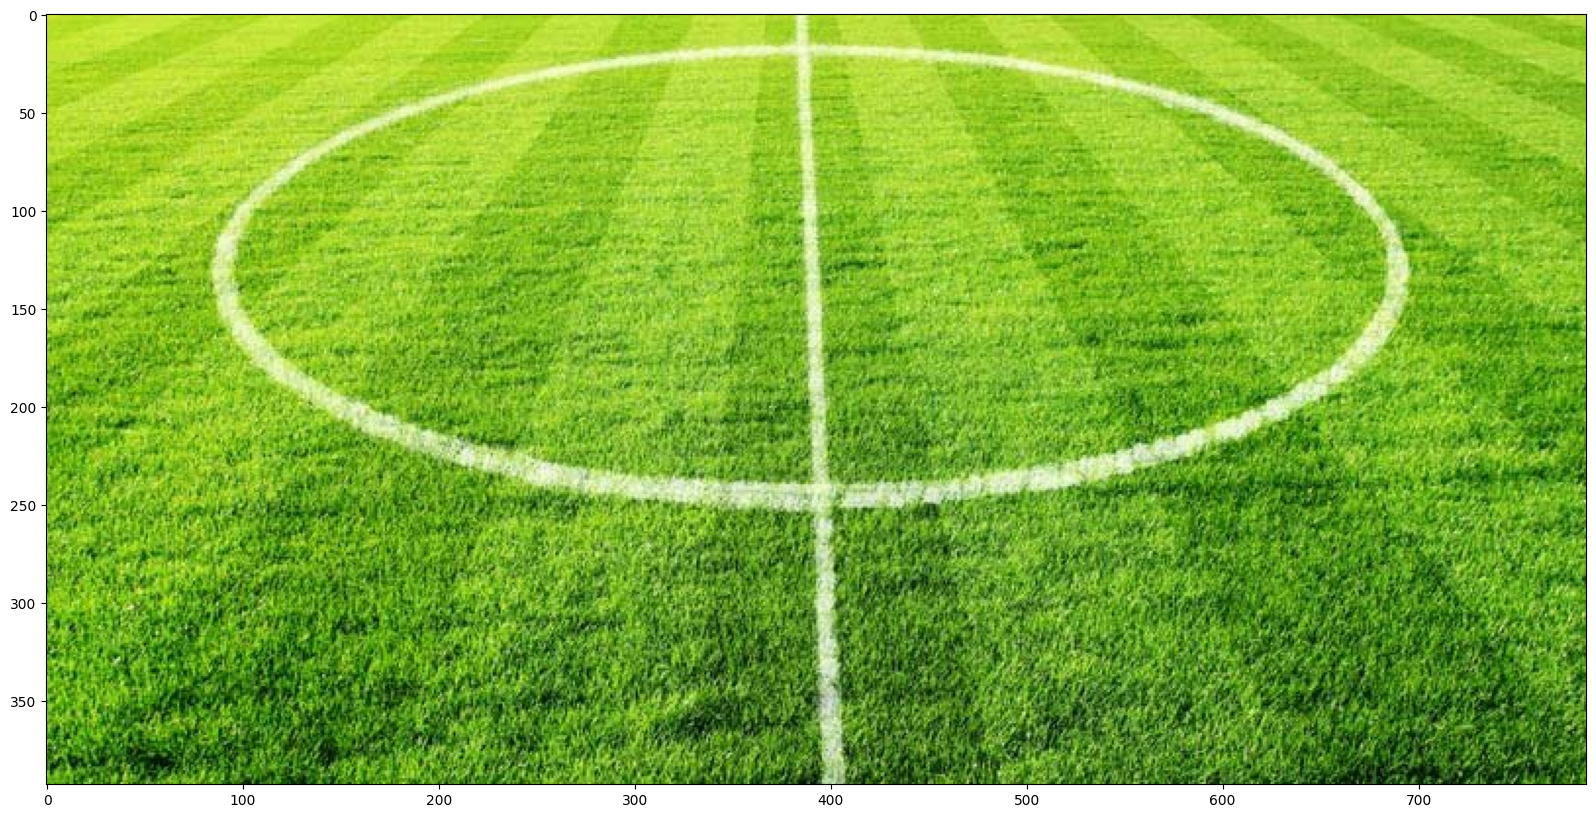

In [23]:
imagem_path = "imagens/futebol.jpg"
imagem = cv2.imread(imagem_path)
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem)

In [11]:
#IMPLEMENTAR

In [29]:

def extrair_cor_caracteristica(imagem_path):
    """
    Extrai as principais características de cores de uma imagem com base no histograma do canal Hue (HSV).

    Args:
        imagem_path (str): Caminho para a imagem.

    Returns:
        set: Conjunto das principais cores detectadas na imagem.
    """
    # Carregar a imagem e converter para o espaço de cores HSV
    imagem_bgr = cv2.imread(imagem_path)
    if imagem_bgr is None:
        raise ValueError(f"Não foi possível carregar a imagem em: {imagem_path}")

    imagem_hsv = cv2.cvtColor(imagem_bgr, cv2.COLOR_BGR2HSV)

    # Calcular o histograma para o canal Hue
    hue_hist = cv2.calcHist([imagem_hsv], [0], None, [180], [0, 180])
    hue_hist = hue_hist.ravel()

    # Normalizar o histograma
    hue_hist = hue_hist / hue_hist.sum()

    # Mostrar o histograma do canal Hue
    plt.figure(figsize=(10, 5))
    plt.title("Histograma do Canal Hue (HSV)")
    plt.xlabel("Hue")
    plt.ylabel("Frequência Normalizada")
    plt.plot(hue_hist, color='orange')
    plt.grid()
    plt.show()

    # Obter os índices das 3 cores mais representativas
    top_hues = np.argpartition(hue_hist, -3)[-3:]

    # Mapear os índices de Hue para cores
    def hue_to_color(hue):
        if 0 <= hue <= 15 or 165 <= hue <= 180:
            return "vermelho"
        elif 16 <= hue <= 22:
            return "laranja"
        elif 23 <= hue <= 30:
            return "amarelo"
        elif 31 <= hue <= 75:
            return "verde"
        elif 76 <= hue <= 105:
            return "ciano"
        elif 106 <= hue <= 135:
            return "azul"
        elif 136 <= hue <= 164:
            return "magenta"
        else:
            return "indefinido"

    cores = {hue_to_color(hue) for hue in top_hues}
    return cores


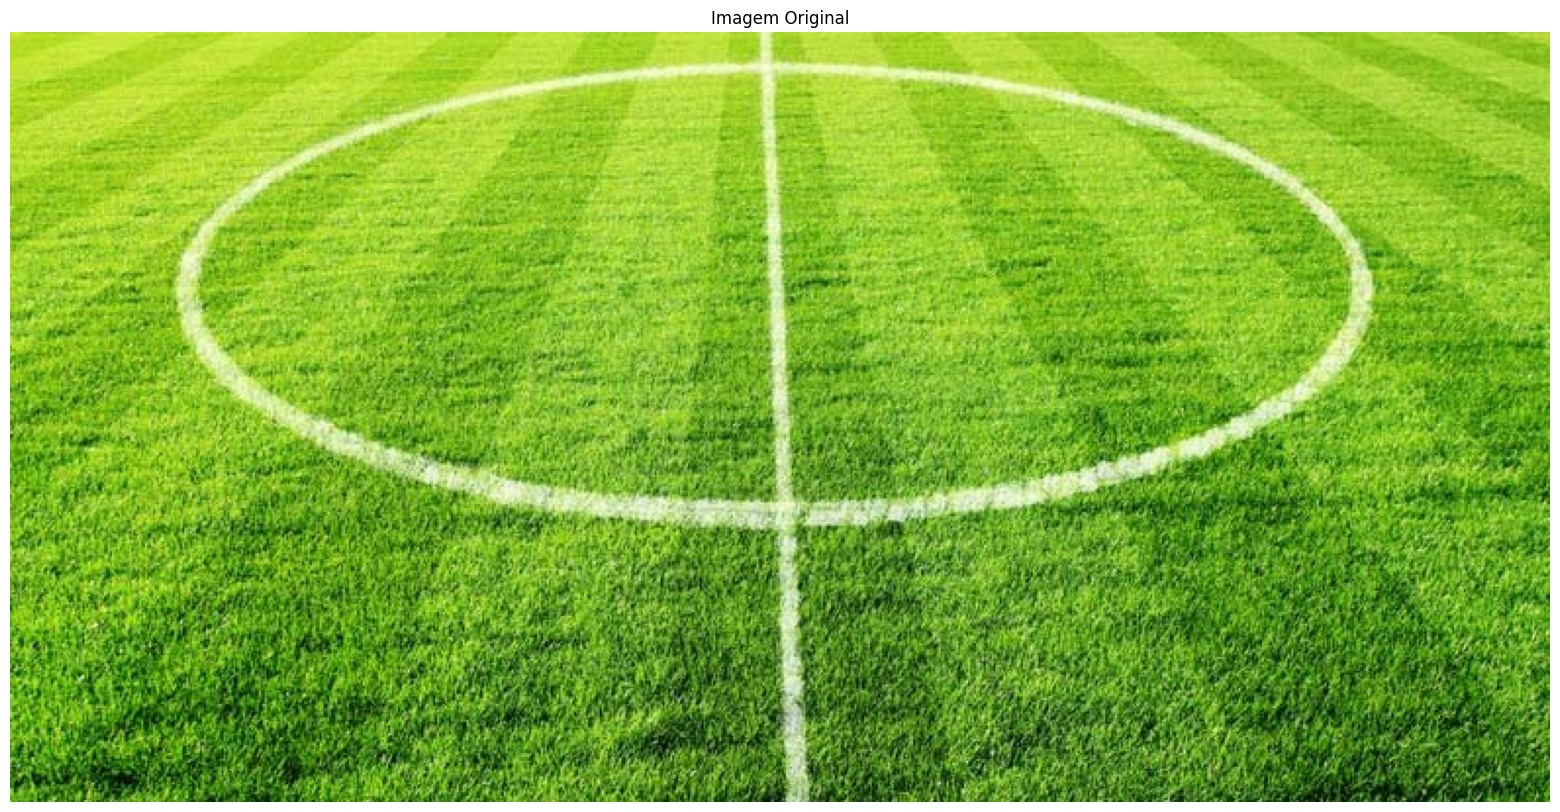

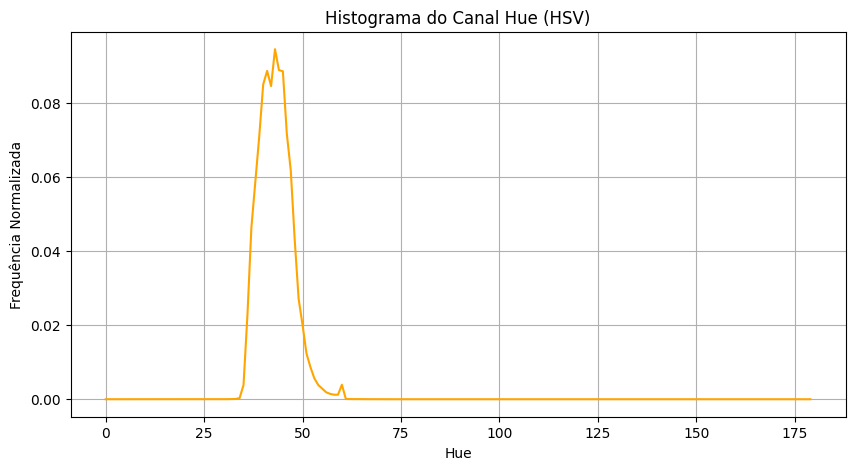

Cores principais detectadas: {'verde'}


In [30]:
# Caminho da imagem
# imagem_path = "imagens/simpsons.jpeg"
# imagem_path = "imagens/moda.jpg"
imagem_path = "imagens/futebol.jpg"

# Mostrar a imagem original
imagem = cv2.imread(imagem_path)
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 10))
plt.title("Imagem Original")
plt.imshow(imagem_rgb)
plt.axis("off")
plt.show()

# Extrair as cores principais
cores_detectadas = extrair_cor_caracteristica(imagem_path)
print("Cores principais detectadas:", cores_detectadas)